In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from meas_data_preprocessing import *

/Users/sascha/opt/anaconda3/lib/python3.7/site-packages/PyDynamic/identification/fit_filter.py:34: DeprecationWarning: The module *identification* will be combined with the module *deconvolution* and renamed to *model_estimation* in the next major release 2.0.0. From then on you should only use the new module *model_estimation* instead.
  DeprecationWarning)


# Read data for a selected measurement scenario

In [3]:
infos, measurement_data = read_data(meas_scenario = 13)

The file MeasuredSignals/pD-Mode 7 MHz/pD7_MH44.DAT was read and it contains 2500 data points.
The time increment is 2e-09 s


In [4]:
# metadata for chosen measurement scenario
for key in infos.keys():
    print("%20s: %s" %(key,infos[key]))

                   i: 13
       hydrophonname: GAMPT MH44
     measurementtype: Pulse-Doppler-Mode 7 MHz
     measurementfile: MeasuredSignals/pD-Mode 7 MHz/pD7_MH44.DAT
           noisefile: MeasuredSignals/pD-Mode 7 MHz/pD7_MH44r.DAT
         hydfilename: HydrophonCalibrationData/MW_MH44ReIm.csv


In [5]:
# available measurement data
for key in measurement_data.keys():
    print("%10s: %s"%(key, type(measurement_data[key])))

      name: <class 'str'>
   voltage: <class 'numpy.ndarray'>
      time: <class 'numpy.ndarray'>


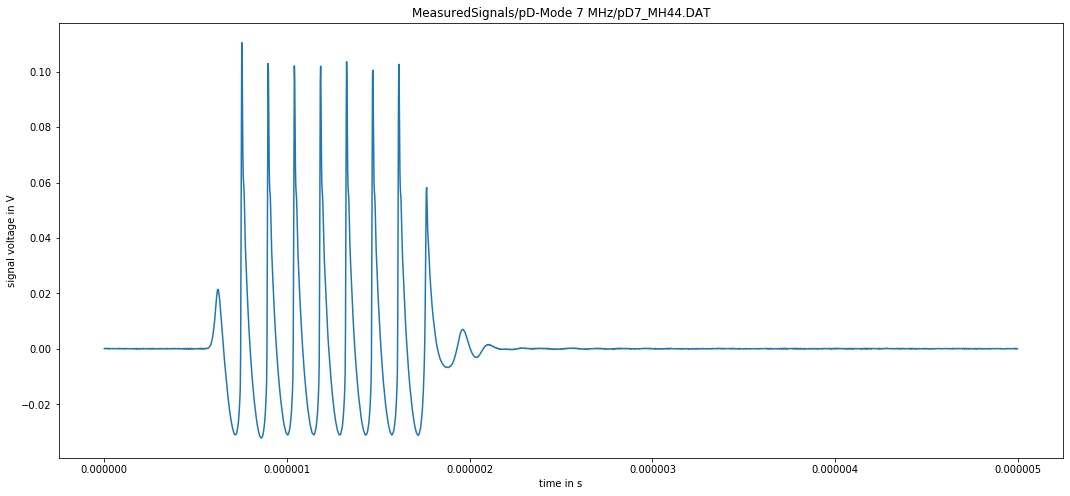

In [6]:
figure(figsize=(18,8))
plot(measurement_data["time"], measurement_data["voltage"])
xlabel("time in s"); ylabel("signal voltage in V")
title(measurement_data["name"]);

# Remove DC component

In [7]:
measurement_data = remove_DC_component(measurement_data)

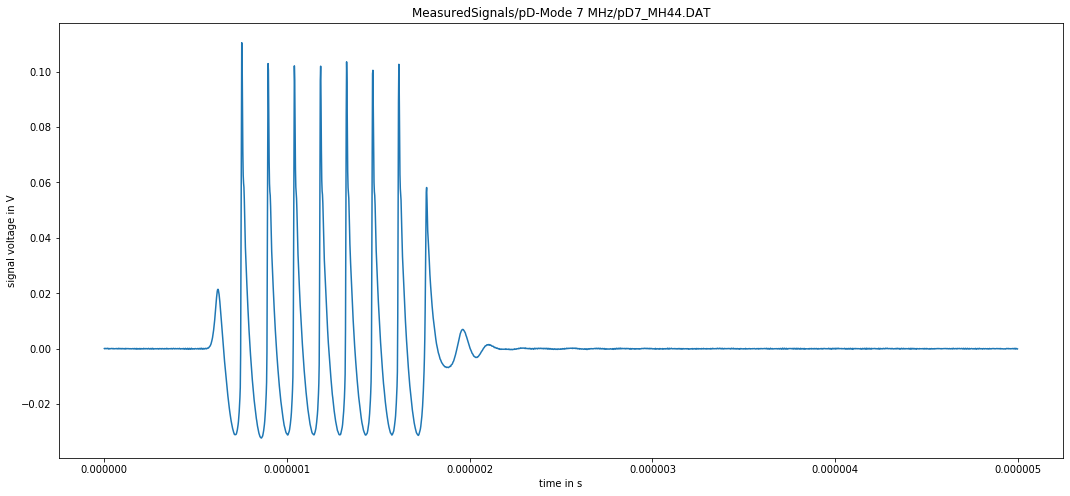

In [8]:
figure(figsize=(18,8))
plot(measurement_data["time"], measurement_data["voltage"])
xlabel("time in s"); ylabel("signal voltage in V")
title(measurement_data["name"]);

# Calculate measurement uncertainty from noise data

In [9]:
measurement_data = uncertainty_from_noisefile(infos, measurement_data, do_plot=False)

The file "MeasuredSignals/pD-Mode 7 MHz/pD7_MH44r.DAT" was read and it contains 2500 data points


In [10]:
# available measurement data
for key in measurement_data.keys():
    print("%12s: %s"%(key, type(measurement_data[key])))

        name: <class 'str'>
     voltage: <class 'numpy.ndarray'>
        time: <class 'numpy.ndarray'>
 uncertainty: <class 'numpy.ndarray'>


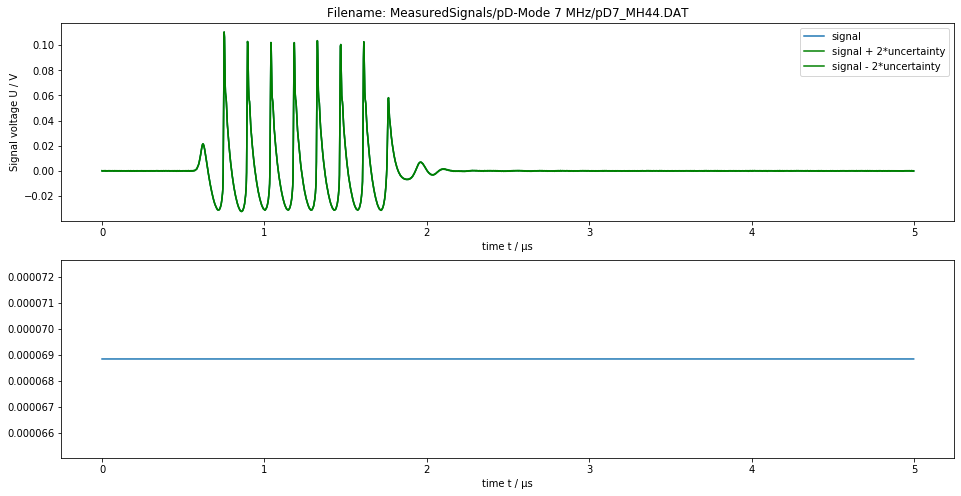

In [11]:
figure(figsize=(16,8))
subplot(211)
plot(measurement_data["time"] / 1e-6, measurement_data["voltage"])
plot(measurement_data["time"] / 1e-6, measurement_data["voltage"] + 2 * measurement_data["uncertainty"], "g")
plot(measurement_data["time"] / 1e-6, measurement_data["voltage"] - 2 * measurement_data["uncertainty"], "g")
legend(["signal", "signal + 2*uncertainty", "signal - 2*uncertainty"])
xlabel("time t / µs")
ylabel("Signal voltage U / V")
title("Filename: {}".format(measurement_data["name"]))

subplot(212)
plot(measurement_data["time"] / 1e-6, measurement_data["uncertainty"])
xlabel("time t / µs");

# Calculate spectrum of measured data

In [12]:
measurement_data = calculate_spectrum(measurement_data, do_plot = False)

In [13]:
# available measurement data
for key in measurement_data.keys():
    print("%12s: %s"%(key, type(measurement_data[key])))

        name: <class 'str'>
     voltage: <class 'numpy.ndarray'>
        time: <class 'numpy.ndarray'>
 uncertainty: <class 'numpy.ndarray'>
   frequency: <class 'numpy.ndarray'>
    spectrum: <class 'numpy.ndarray'>
     varspec: <class 'numpy.ndarray'>


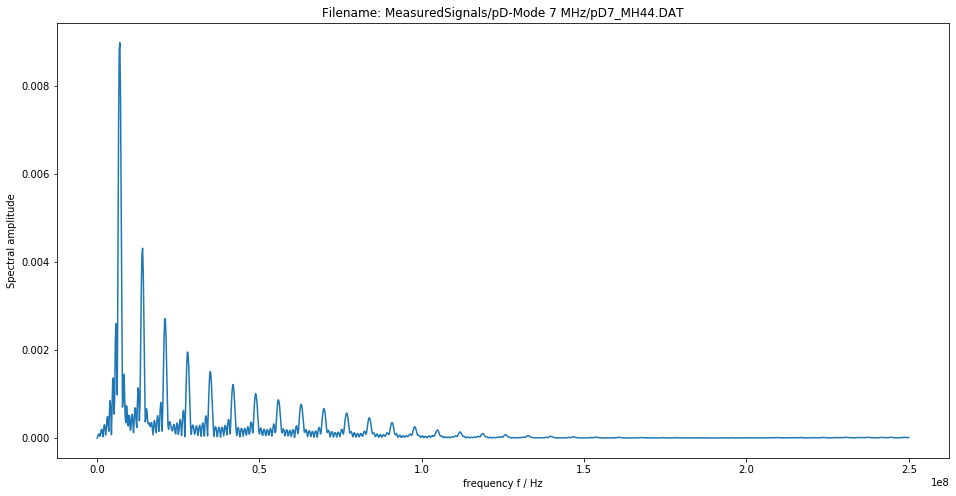

In [14]:
figure(figsize=(16,8))
plot(realpart(measurement_data["frequency"]), amplitude(measurement_data["spectrum"]))
xlabel("frequency f / Hz")
ylabel("Spectral amplitude")
title("Filename: {}".format(measurement_data["name"]));